# Exercise 1

Write the `PointsDataset` class that implements the `torch.utils.data.Dataset` interface:
* Reads a txt file in which each line represents a bidimensional data point, with each dimension separated by a space.
* Saves the content of the file in a data structure of your choice
* The `__len__(self)` method should return the number of data points
* The `__getitem__(self, i)` method should return the i-th data point as a tuple.

Write the `LineModule` class that implements the `torch.nn.Module` interface implementing the function $f(x) = wx$
* `LineModule` has 1 parameter $w$
* The `forward(self, x)` method should return $wx$


Write a complete python script that trains LineModule to approximate the data in `dataset1.txt`
* Use the SGD optimizer from `torch.optim`
* Use the MSELoss from `torch.nn`
* Use a batch_size of 8
* Use a learning rate of 0.001
* Train for 1000 epochs



In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import trange

In [14]:
class PointDataset(torch.utils.data.Dataset):
    def __init__(self, filename):
        self.data = []
        
        with open(filename, 'r') as f:
            for line in f:
                x, y = line.split(" ")
                x, y = float(x), float(y)
                self.data.append((x, y))
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    def plot(self, show=True):
        x_values, y_values = zip(*self.data)
        plt.scatter(x_values, y_values)
        if show:
            plt.show()

In [45]:
class LineModule(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand(1))
    
    def forward(self, x):
        return self.w * x
    
    def plot(self, x, show=True):
        y_points = self.forward(x)
        plt.plot(x.detach().numpy(), y_points.detach().numpy(), color="red")
        if show:
            plt.show()

In [48]:
ds = PointDataset("dataset1.txt")
model = LineModule()
dl = torch.utils.data.DataLoader(ds, batch_size=8)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

loss_history = list()

for epoch in trange(1000):
    for i, batch in enumerate(dl):
        x, y = batch
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 5 == 0:
            loss_history.append(loss.item())


# plt.plot(loss_history)
# plt.title("Loss History")
# plt.show()

100%|██████████| 1000/1000 [00:03<00:00, 301.68it/s]


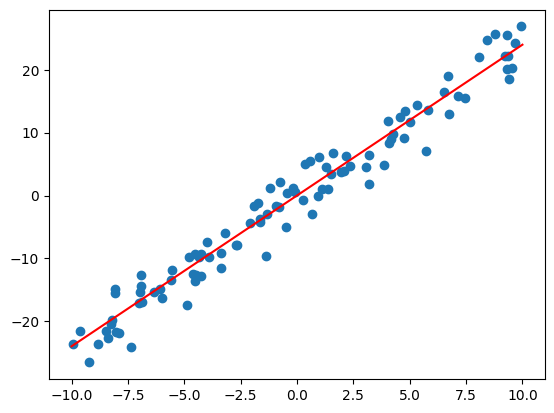

In [50]:
x_range = torch.linspace(-10, 10, 100)
ds.plot(show=False)
model.plot(x_range, show=False)
plt.show()